In [2]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 MB 22.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 18.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2

In [4]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 888.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 23.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.3/259.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 22.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt

In [4]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
classLabels = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [7]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
print(len(classLabels))

80


In [9]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) #255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) #mobilenet => [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 0x134116e90>

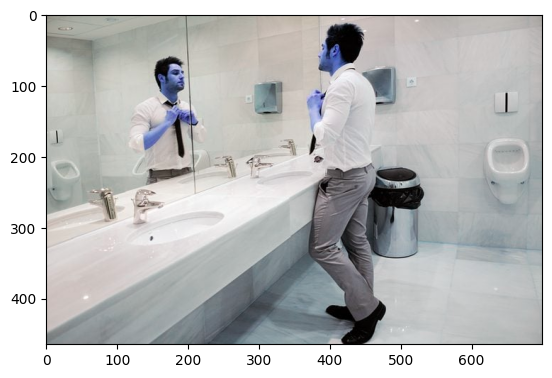

In [10]:
# read an image

img = cv2.imread('shutterstock_100827769.jpg')
plt.imshow(img)

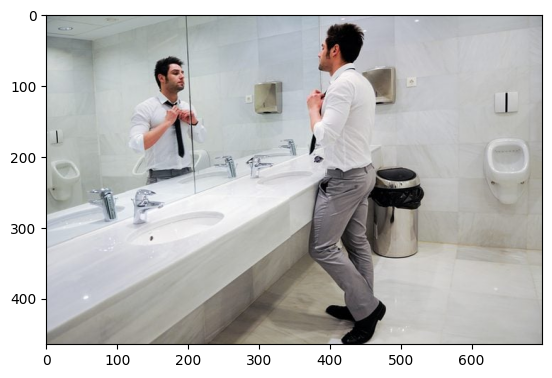

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [13]:
print(ClassIndex)

[ 1 70 81 70 81]


In [14]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

IndexError: list index out of range

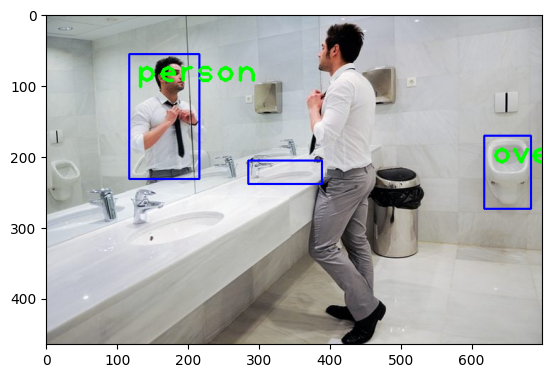

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [19]:
# Video demo
cap = cv2.VideoCapture('highway.mp4')

# Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)

    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

    cv2.imshow('Object Detection Tutorial',frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[1]
[1]
()
[1]
[1]
[1]
[1]
()
()
()
()
()
()
[1]
[1]
()
()
()
()
()
()
()
()
()
()
()
[1]
[1 1 1]
[1 1]
[1 1]
[1 1 1]
[1]
[1 1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1]
[1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1]
[1 1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1]
[1]
[ 1 43]
()
[1]
[1]
[1]
[1]
[1]
[1]
[ 1  1 43 43]
[1 1]
[1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1]
[1 1]
[1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[ 1 37]
[1]
()
[1]
()
()
()
()
()
()
()
[1]
[1]
[1]
[ 1 43]
[43  1]
[ 1 43]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]

KeyboardInterrupt: 